# 逐次学習を実装
- その日までのデータを学習させて次の日を予測
- すべてのデータで精度を検証できる

In [1]:
import time

import pandas as pd
import numpy as np
import random
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# 自作関数
from dataload.data_load import data_load
from func.my_func import *

In [2]:
date = '20220619'
use_users = [
    1504, 1505, 
    # 1755, 
    # 1737,
    1781, 
    # 1774, 
    # 1773
    ]

In [3]:
def create_X_y(user_id):
    INPUT_DIR = '../data/'

    df = pd.read_csv(INPUT_DIR + f'exp_df_{user_id}_{date}.csv')
    X = df.drop([
        'UserID',
        'TargetDate',
        'y',
        'mean',
        # 'Step'
        ], axis=1)
    y = df[['y', 'mean']].fillna(0)
    return X, y

In [4]:
INPUT_DIR = '../data/'
df = pd.read_csv(INPUT_DIR + f'exp_df_{use_users[0]}_{date}.csv')
df

,UserID,TargetDate,DiffRestHrValue,DiffWakedHrValue,StressCount,SleepHours,DeepSleepRate,Step,LowActivityHourws,y,mean
0,1504,2022-02-17,-5.0,1.200000,1.0,8.200000,0.300000,25805,4.6,0,2.4
1,1504,2022-02-18,-3.5,-5.800000,1.0,4.800000,0.500000,5931,7.5,0,2.2
2,1504,2022-02-19,2.5,3.700000,1.0,6.800000,0.400000,14598,10.0,0,2.6
3,1504,2022-02-20,17.4,2.400000,11.0,5.800000,0.400000,27546,4.2,0,2.6
4,1504,2022-02-21,20.4,12.400000,28.0,5.900000,0.400000,32047,6.0,1,3.0
5,1504,2022-02-22,12.4,22.400000,35.0,6.669748,0.357143,12596,7.8,1,3.0
6,1504,2022-02-23,10.4,0.498305,0.0,7.700000,0.400000,16140,6.0,0,2.8
7,1504,2022-02-25,16.2,0.498305,5.0,6.700000,0.400000,478,3.7,0,2.6
8,1504,2022-02-26,13.2,7.200000,12.0,6.200000,0.400000,31189,5.1,0,2.8
9,1504,2022-02-27,-4.5,-2.500000,1.0,5.900000,0.500000,24151,5.4,0,2.8


In [5]:
df.columns

Index(['UserID', 'TargetDate', 'DiffRestHrValue', 'DiffWakedHrValue',
       'StressCount', 'SleepHours', 'DeepSleepRate', 'Step',
       'LowActivityHourws', 'y', 'mean'],
      dtype='object')

In [7]:
X

,DiffRestHrValue,DiffWakedHrValue,StressCount,SleepHours,DeepSleepRate,Step,LowActivityHourws
0,-8.1,24.200000,1.0,6.200000,0.400000,15886,5.7
1,-5.0,3.700000,1.0,7.000000,0.500000,14965,4.6
2,-9.3,-0.200000,1.0,5.500000,0.400000,12245,3.7
3,3.7,-3.500000,10.0,7.600000,0.500000,24618,2.0
4,25.2,29.500000,52.0,7.000000,0.500000,13348,2.7
...,...,...,...,...,...,...,...
82,-5.8,-17.100000,0.0,6.761538,0.447253,17886,4.8
83,19.0,0.895402,0.0,5.600000,0.500000,743,2.2
84,-7.5,3.200000,2.0,6.800000,0.500000,3811,4.5
85,1.7,-16.600000,2.0,5.200000,0.400000,10194,2.2


1504


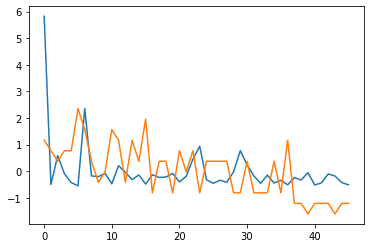

,MD,answer
MD,1.000000,0.187607
answer,0.187607,1.000000


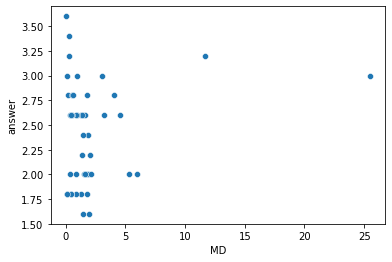

1505


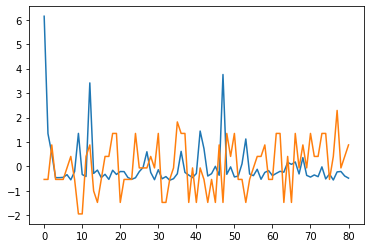

,MD,answer
MD,1.000000,-0.126833
answer,-0.126833,1.000000


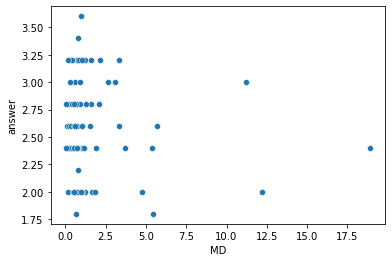

1781


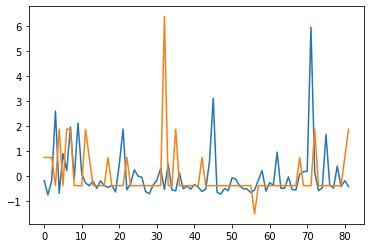

,MD,answer
MD,1.000000,-0.071474
answer,-0.071474,1.000000


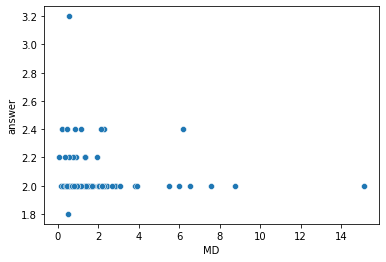

In [6]:
for user in use_users:
    print(user)
    X, y = create_X_y(user)
    df = pd.DataFrame(columns=['MD', 'answer'], index=range(5, len(X)))
    for i in range(5, len(X)):
        X_train = X.iloc[:i]
        y_train = y['y'].iloc[:i]
        X_test = X.iloc[[i]]
        result_scaler, result_inv_C, select_columns = fit_MTS(X_train, y_train)
        y_proba = predict_MD(X_test, result_scaler, result_inv_C, select_columns)
        df.loc[i, 'MD'] = y_proba[0]
        df.loc[i, 'answer'] = y['mean'].iloc[i]
    scaler = StandardScaler()
    plt.plot(scaler.fit_transform(df))
    plt.show()
    display(pd.DataFrame(scaler.fit_transform(df), columns=df.columns).corr())
    sns.scatterplot(x='MD', y='answer',data=df.reset_index(drop=True))
    plt.show()